In [66]:
import sys
print(sys.executable)

/Users/t2023-m0051/Documents/GitHub/5mygodproject700/5mgproject/bin/python


In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

%matplotlib inline

/Users/t2023-m0051/Documents/GitHub/5mygodproject700/5mgproject/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Users/t2023-m0051/Documents/GitHub/5mygodproject700/5mgproject/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Users/t2023-m0051/Documents/GitHub/5mygodproject700/5mgproject/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Users/t2023-m0051/Documents/GitHub/5mygodproject700/5mgproject/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Users/t2023-m0051/Documents/GitHub/5mygodproject700/5mgproject/lib/python3.12/si

In [57]:
accepted = pd.read_csv('accepted.csv')

accepted.head(10)

/var/folders/z9/dzxcw2k50f17832w60gvr9qw0000gn/T/ipykernel_35857/3139946073.py:1: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  accepted = pd.read_csv('accepted.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
5,68426831,NaN,11950.0,11950.0,11950.0,36 months,13.44,405.18,C,C3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
6,68476668,NaN,20000.0,20000.0,20000.0,36 months,9.17,637.58,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
7,67275481,NaN,20000.0,20000.0,20000.0,36 months,8.49,631.26,B,B1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
8,68466926,NaN,10000.0,10000.0,10000.0,36 months,6.49,306.45,A,A2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
9,68616873,NaN,8000.0,8000.0,8000.0,36 months,11.48,263.74,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
len(accepted)

2260701

In [44]:
list(accepted.columns)

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 '

In [37]:
accepted["loan_status"].head(20)

0      Fully Paid
1      Fully Paid
2      Fully Paid
3         Current
4      Fully Paid
5      Fully Paid
6      Fully Paid
7      Fully Paid
8      Fully Paid
9      Fully Paid
10        Current
11        Current
12     Fully Paid
13    Charged Off
14     Fully Paid
15     Fully Paid
16     Fully Paid
17     Fully Paid
18        Current
19     Fully Paid
Name: loan_status, dtype: object

In [38]:
accepted.isnull().sum()

id                             0
member_id                2260701
loan_amnt                     33
funded_amnt                   33
funded_amnt_inv               33
                          ...   
settlement_status        2226455
settlement_date          2226455
settlement_amount        2226455
settlement_percentage    2226455
settlement_term          2226455
Length: 151, dtype: int64

In [52]:
threshold = 0.9
accepted_cleaned = accepted.loc[:, accepted.isnull().mean() < threshold]

dropped_cols = accepted.columns[accepted.isnull().mean() >= threshold]
print("제거된 컬럼 수:", len(dropped_cols))
print(dropped_cols)

list(accepted_cleaned.columns)

제거된 컬럼 수: 38
Index(['member_id', 'desc', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'revol_bal_joint',
       'sec_app_fico_range_low', 'sec_app_fico_range_high',
       'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths',
       'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util',
       'sec_app_open_act_il', 'sec_app_num_rev_accts',
       'sec_app_chargeoff_within_12_mths',
       'sec_app_collections_12_mths_ex_med',
       'sec_app_mths_since_last_major_derog', 'hardship_type',
       'hardship_reason', 'hardship_status', 'deferral_term',
       'hardship_amount', 'hardship_start_date', 'hardship_end_date',
       'payment_plan_start_date', 'hardship_length', 'hardship_dpd',
       'hardship_loan_status', 'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percenta

['id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

In [39]:
accepted.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,2.258957e+06,2.260639e+06,2.260668e+06,...,10917.0,10917.000000,10917.0,10917.000000,8651.000000,10917.000000,10917.000000,34246.000000,34246.000000,34246.000000
mean,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309283e+01,4.458068e+02,7.799243e+04,1.882420e+01,3.068792e-01,6.985882e+02,...,3.0,155.045981,3.0,13.743886,454.798089,11636.883942,193.994321,5010.664267,47.780365,13.191322
std,NaN,9.190245e+03,9.188413e+03,9.192332e+03,4.832138e+00,2.671735e+02,1.126962e+05,1.418333e+01,8.672303e-01,3.301038e+01,...,0.0,129.040594,0.0,9.671178,375.385500,7625.988281,198.629496,3693.122590,7.311822,8.159980
min,NaN,5.000000e+02,5.000000e+02,0.000000e+00,5.310000e+00,4.930000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,6.100000e+02,...,3.0,0.640000,3.0,0.000000,1.920000,55.730000,0.010000,44.210000,0.200000,0.000000
25%,NaN,8.000000e+03,8.000000e+03,8.000000e+03,9.490000e+00,2.516500e+02,4.600000e+04,1.189000e+01,0.000000e+00,6.750000e+02,...,3.0,59.440000,3.0,5.000000,175.230000,5627.000000,44.440000,2208.000000,45.000000,6.000000
50%,NaN,1.290000e+04,1.287500e+04,1.280000e+04,1.262000e+01,3.779900e+02,6.500000e+04,1.784000e+01,0.000000e+00,6.900000e+02,...,3.0,119.140000,3.0,15.000000,352.770000,10028.390000,133.160000,4146.110000,45.000000,14.000000
75%,NaN,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.933200e+02,9.300000e+04,2.449000e+01,0.000000e+00,7.150000e+02,...,3.0,213.260000,3.0,22.000000,620.175000,16151.890000,284.190000,6850.172500,50.000000,18.000000
max,NaN,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,9.990000e+02,5.800000e+01,8.450000e+02,...,3.0,943.940000,3.0,37.000000,2680.890000,40306.410000,1407.860000,33601.000000,521.350000,181.000000


In [40]:
accepted['loan_status'].unique()

array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default', nan,
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [41]:
accepted['loan_status'].value_counts()

loan_status
Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: count, dtype: int64

In [58]:
채무불이행 = ["Charged Off", "Default", "Does not meet the credit policy. Status:Charged Off", "In Grace Period",
            "Late (16-30 days)", "Late (31-120 days)"]
accepted['repayment_status_int'] = accepted['loan_status'].apply(lambda status: 1 if status in 채무불이행 else 0).astype(int)
accepted['repayment_status'] = np.where(accepted['repayment_status_int'] == 0, '채무이행', '채무불이행')

accepted.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,repayment_status_int,repayment_status
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0,채무이행
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0,채무이행
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0,채무이행
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0,채무이행
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0,채무이행
5,68426831,NaN,11950.0,11950.0,11950.0,36 months,13.44,405.18,C,C3,...,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0,채무이행
6,68476668,NaN,20000.0,20000.0,20000.0,36 months,9.17,637.58,B,B2,...,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0,채무이행
7,67275481,NaN,20000.0,20000.0,20000.0,36 months,8.49,631.26,B,B1,...,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0,채무이행
8,68466926,NaN,10000.0,10000.0,10000.0,36 months,6.49,306.45,A,A2,...,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0,채무이행
9,68616873,NaN,8000.0,8000.0,8000.0,36 months,11.48,263.74,B,B5,...,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0,채무이행


In [59]:
selected_cols = [
    'loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
    'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
    'verification_status', 'purpose', 'dti', 'fico_range_low', 'fico_range_high',
    'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'loan_status'
]

accepted_selected = accepted[selected_cols]

In [13]:
accepted_selected.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,fico_range_low,fico_range_high,open_acc,revol_bal,revol_util,total_acc
count,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,2.258957e+06,2.260668e+06,2.260668e+06,2.260639e+06,2.260668e+06,2.258866e+06,2.260639e+06
mean,1.504693e+04,1.309283e+01,4.458068e+02,7.799243e+04,1.882420e+01,6.985882e+02,7.025884e+02,1.161240e+01,1.665846e+04,5.033770e+01,2.416255e+01
std,9.190245e+03,4.832138e+00,2.671735e+02,1.126962e+05,1.418333e+01,3.301038e+01,3.301124e+01,5.640861e+00,2.294831e+04,2.471307e+01,1.198753e+01
min,5.000000e+02,5.310000e+00,4.930000e+00,0.000000e+00,-1.000000e+00,6.100000e+02,6.140000e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,8.000000e+03,9.490000e+00,2.516500e+02,4.600000e+04,1.189000e+01,6.750000e+02,6.790000e+02,8.000000e+00,5.950000e+03,3.150000e+01,1.500000e+01
50%,1.290000e+04,1.262000e+01,3.779900e+02,6.500000e+04,1.784000e+01,6.900000e+02,6.940000e+02,1.100000e+01,1.132400e+04,5.030000e+01,2.200000e+01
75%,2.000000e+04,1.599000e+01,5.933200e+02,9.300000e+04,2.449000e+01,7.150000e+02,7.190000e+02,1.400000e+01,2.024600e+04,6.940000e+01,3.100000e+01
max,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,9.990000e+02,8.450000e+02,8.500000e+02,1.010000e+02,2.904836e+06,8.923000e+02,1.760000e+02


/var/folders/z9/dzxcw2k50f17832w60gvr9qw0000gn/T/ipykernel_14269/1308600182.py:7: UserWarning: Glyph 49707 (\N{HANGUL SYLLABLE SUS}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/z9/dzxcw2k50f17832w60gvr9qw0000gn/T/ipykernel_14269/1308600182.py:7: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/z9/dzxcw2k50f17832w60gvr9qw0000gn/T/ipykernel_14269/1308600182.py:7: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/z9/dzxcw2k50f17832w60gvr9qw0000gn/T/ipykernel_14269/1308600182.py:7: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/z9/dzxcw2k50f17832w60gvr9qw0000gn/T/ipykernel_14269/1308600182.py:7: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/z9/dzxcw2k50f17832w60gvr9qw0000gn/T/ipykernel_14269/1308600182.py:7: UserW

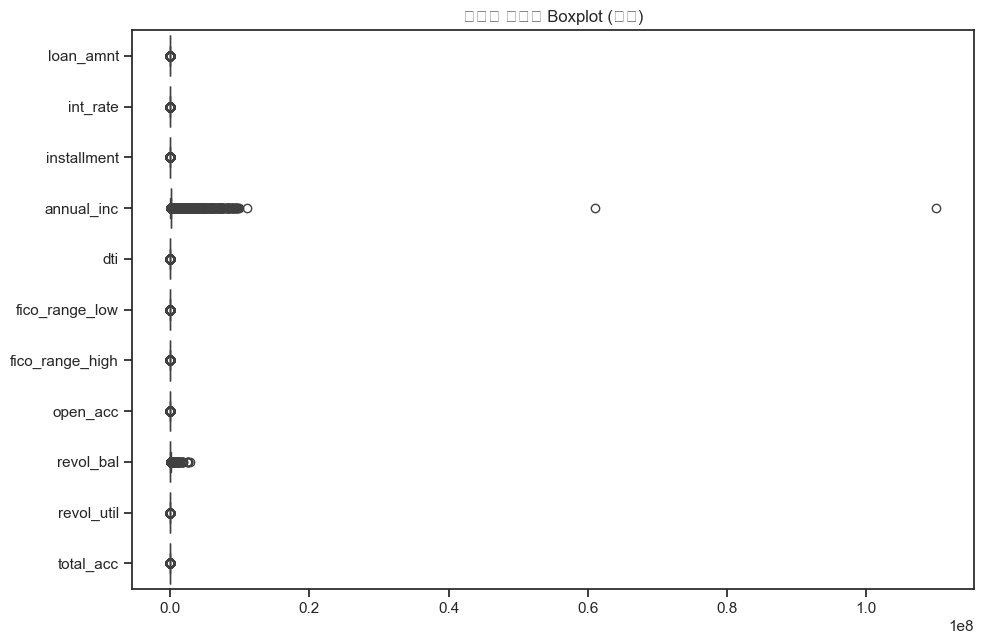

In [ ]:
numeric_cols = accepted_selected.select_dtypes(include=['number']).columns

plt.figure(figsize=(10, len(numeric_cols) * 0.6)) 
sns.boxplot(data=accepted_selected[numeric_cols], orient='h')
plt.yticks(rotation=0)
plt.title("숫자형 변수의 Boxplot (가로)")
plt.tight_layout()
plt.show()

/var/folders/z9/dzxcw2k50f17832w60gvr9qw0000gn/T/ipykernel_14269/3795868332.py:5: UserWarning: Glyph 49707 (\N{HANGUL SYLLABLE SUS}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/z9/dzxcw2k50f17832w60gvr9qw0000gn/T/ipykernel_14269/3795868332.py:5: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/z9/dzxcw2k50f17832w60gvr9qw0000gn/T/ipykernel_14269/3795868332.py:5: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/z9/dzxcw2k50f17832w60gvr9qw0000gn/T/ipykernel_14269/3795868332.py:5: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/z9/dzxcw2k50f17832w60gvr9qw0000gn/T/ipykernel_14269/3795868332.py:5: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/z9/dzxcw2k50f17832w60gvr9qw0000gn/T/ipykernel_14269/3795868332.py:5: UserW

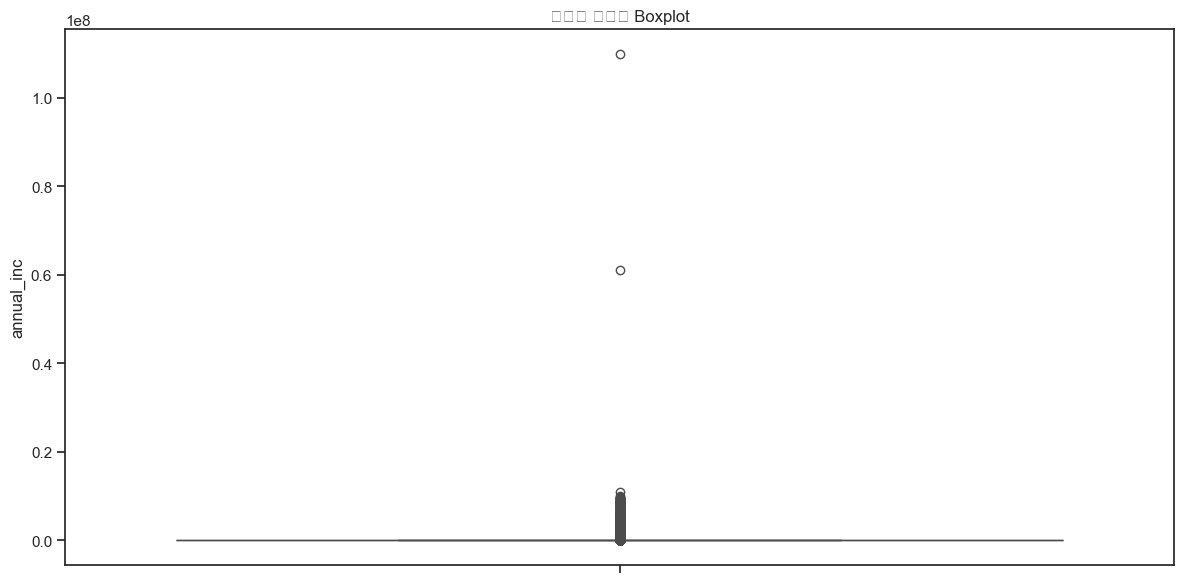

In [71]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=accepted_selected["annual_inc"])
plt.xticks(rotation=45) 
plt.title("숫자형 변수의 Boxplot")
plt.tight_layout()
plt.show()


/var/folders/z9/dzxcw2k50f17832w60gvr9qw0000gn/T/ipykernel_14269/3780844966.py:12: UserWarning: Glyph 49707 (\N{HANGUL SYLLABLE SUS}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/z9/dzxcw2k50f17832w60gvr9qw0000gn/T/ipykernel_14269/3780844966.py:12: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/z9/dzxcw2k50f17832w60gvr9qw0000gn/T/ipykernel_14269/3780844966.py:12: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/z9/dzxcw2k50f17832w60gvr9qw0000gn/T/ipykernel_14269/3780844966.py:12: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/z9/dzxcw2k50f17832w60gvr9qw0000gn/T/ipykernel_14269/3780844966.py:12: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/z9/dzxcw2k50f17832w60gvr9qw0000gn/T/ipykernel_14269/3780844966.py:12:

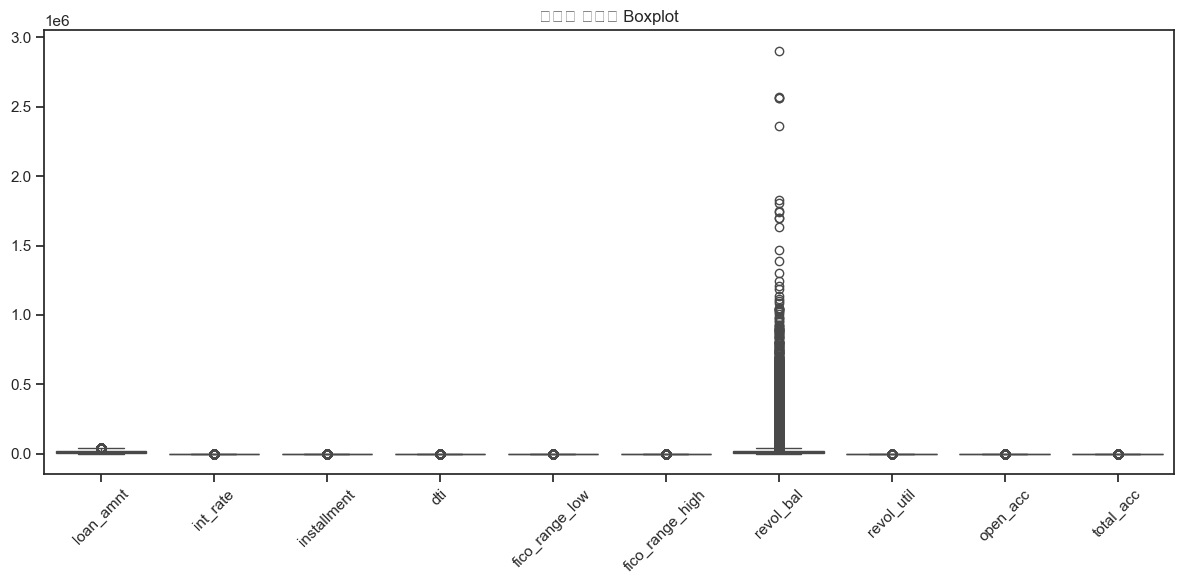

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ["loan_amnt", "int_rate", "installment", "dti",
        "fico_range_low", "fico_range_high", "revol_bal", "revol_util",
        "open_acc", "total_acc"]

plt.figure(figsize=(12, 6))
sns.boxplot(data=accepted_selected[cols])
plt.xticks(rotation=45) 
plt.title("숫자형 변수의 Boxplot")
plt.tight_layout()
plt.show()

In [14]:
accepted_selected.isnull().sum()

loan_amnt                  33
term                       33
int_rate                   33
installment                33
grade                      33
sub_grade                  33
emp_title              167002
emp_length             146940
home_ownership             33
annual_inc                 37
verification_status        33
purpose                    33
dti                      1744
fico_range_low             33
fico_range_high            33
open_acc                   62
revol_bal                  33
revol_util               1835
total_acc                  62
loan_status                33
dtype: int64

In [10]:
from ydata_profiling import ProfileReport

profile = ProfileReport(accepted_selected)
profile.to_file('accepted_selected.html')

/Users/t2023-m0051/Documents/GitHub/5mygodproject700/5mgproject/lib/python3.12/site-packages/ydata_profiling/utils/dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 130.55it/s]


In [68]:
# =====================[ IQR 이상치 제거 함수 ]=====================
def remove_outliers_iqr(accepted_selected, cols):
    for col in cols:
        Q1 = accepted_selected[col].quantile(0.25)
        Q3 = accepted_selected[col].quantile(0.75)
        IQR = Q3 - Q1
        mask = (accepted_selected[col] >= Q1 - 1.5*IQR) & (accepted_selected[col] <= Q3 + 1.5*IQR)
        accepted_selected = accepted_selected[mask]
    return accepted_selected.reset_index(drop=True)


iqr_cols = ['loan_amnt', 'installment', 'annual_inc', 'dti',
            'open_acc', 'revol_bal', 'revol_util', 'total_acc']


accepted_filtered = remove_outliers_iqr(accepted_selected, iqr_cols)
accepted_filtered


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,fico_range_low,fico_range_high,open_acc,revol_bal,revol_util,total_acc,loan_status
0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,debt_consolidation,5.91,675.0,679.0,7.0,2765.0,29.7,13.0,Fully Paid
1,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,small_business,16.06,715.0,719.0,22.0,21470.0,19.2,38.0,Fully Paid
2,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,home_improvement,10.78,695.0,699.0,6.0,7869.0,56.2,18.0,Fully Paid
3,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,MORTGAGE,110000.0,Source Verified,debt_consolidation,17.06,785.0,789.0,13.0,7802.0,11.6,17.0,Current
4,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,major_purchase,25.37,695.0,699.0,12.0,21929.0,64.5,35.0,Fully Paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1836825,18000.0,60 months,9.49,377.95,B,B2,NaN,5 years,OWN,130000.0,Not Verified,home_improvement,20.59,735.0,739.0,17.0,23833.0,34.0,39.0,Fully Paid
1836826,16000.0,60 months,12.79,362.34,C,C1,Manager,10+ years,RENT,150000.0,Not Verified,medical,12.25,665.0,669.0,12.0,7700.0,55.0,28.0,Fully Paid
1836827,24000.0,60 months,10.49,515.74,B,B3,Current Operations Officer,4 years,OWN,125000.0,Not Verified,credit_card,10.98,725.0,729.0,15.0,22448.0,22.4,22.0,Current
1836828,24000.0,60 months,14.49,564.56,C,C4,Program Manager,6 years,RENT,110000.0,Not Verified,debt_consolidation,18.30,660.0,664.0,10.0,17641.0,68.1,31.0,Charged Off


In [69]:
# 컬럼별 허용 값 범위로 필터링
accepted_filtered = accepted_filtered[
    (accepted_filtered['int_rate'] >= 6) & (accepted_filtered['int_rate'] <= 31) &
    (accepted_filtered['dti'] >= 0) & (accepted_filtered['dti'] <= 40) &
    (accepted_filtered['annual_inc'] > 0) &
    (accepted_filtered['revol_util'] >= 0) & (accepted_filtered['revol_util'] <= 100) &
    (accepted_filtered['annual_inc'] > 0)
]


In [70]:
# 'emp_length' 결측값을 'Unknown'으로 대체
accepted_filtered['emp_length'] = accepted_filtered['emp_length'].fillna('Unknown')

/var/folders/z9/dzxcw2k50f17832w60gvr9qw0000gn/T/ipykernel_35857/3079894331.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accepted_filtered['emp_length'] = accepted_filtered['emp_length'].fillna('Unknown')


In [77]:
# 'term' 컬럼에서 숫자만 추출하여 정수형으로 변환 ('36 months' → 36)
accepted_filtered['term'] = accepted_filtered['term'].astype(str).str.extract(r'(\d+)').astype(int)

# 'grade' 등급을 문자에서 숫자 코드(0~6)로 변환 ('grade' ML 시 졔외)
grade_map = {'A':6, 'B':5, 'C':4, 'D':3, 'E':2, 'F':1, 'G':0}
accepted_filtered['grade_map'] = accepted_filtered['grade'].map(grade_map)

/var/folders/z9/dzxcw2k50f17832w60gvr9qw0000gn/T/ipykernel_35857/3186197980.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accepted_filtered['term'] = accepted_filtered['term'].astype(str).str.extract(r'(\d+)').astype(int)
/var/folders/z9/dzxcw2k50f17832w60gvr9qw0000gn/T/ipykernel_35857/3186197980.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accepted_filtered['grade_map'] = accepted_filtered['grade'].map(grade_map)


In [78]:
# 'sub_grade' 등급을 문자에서 숫자 코드(0~34)로 변환 ('sub_grade' ML 시 졔외)
import re

accepted_filtered['sub_grade'] = accepted_filtered['sub_grade'].astype(str)

def map_subgrade(sg):
   try:
       sg = str(sg).strip().upper()  
       match = re.match(r'^([A-G])([1-5])$', sg) 
       if match:
           letter = match.group(1)
           number = int(match.group(2))
           return grade_map[letter] * 5 + (5 - number)
       else:
           return None 
   except:
       return None

accepted_filtered['sub_grade_map'] = accepted_filtered['sub_grade'].apply(map_subgrade)

/var/folders/z9/dzxcw2k50f17832w60gvr9qw0000gn/T/ipykernel_35857/3744586439.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accepted_filtered['sub_grade'] = accepted_filtered['sub_grade'].astype(str)
/var/folders/z9/dzxcw2k50f17832w60gvr9qw0000gn/T/ipykernel_35857/3744586439.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accepted_filtered['sub_grade_map'] = accepted_filtered['sub_grade'].apply(map_subgrade)


In [80]:
accepted_filtered['grade']

0          C
1          C
2          B
3          C
4          F
          ..
1836825    B
1836826    C
1836827    B
1836828    C
1836829    C
Name: grade, Length: 1782998, dtype: object

In [83]:
accepted_filtered['sub_grade']

0          C4
1          C1
2          B4
3          C5
4          F1
           ..
1836825    B2
1836826    C1
1836827    B3
1836828    C4
1836829    C4
Name: sub_grade, Length: 1782998, dtype: object

In [87]:
# emp_length 문자에서 숫자 코드(0~10)로 변환 ('emp_length' ML 시 졔외)
emp_length_map = {
   '10+ years': 10,
   '9 years': 9,
   '8 years': 8,
   '7 years': 7,
   '6 years': 6,
   '5 years': 5,
   '4 years': 4,
   '3 years': 3,
   '2 years': 2,
   '1 year': 1,
   '< 1 year': 0.5,
   'n/a': 0
}


accepted_filtered['emp_length_map'] = accepted_filtered['emp_length'].map(emp_length_map)

/var/folders/z9/dzxcw2k50f17832w60gvr9qw0000gn/T/ipykernel_35857/2569823140.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accepted_filtered['emp_length_map'] = accepted_filtered['emp_length'].map(emp_length_map)


In [29]:
accepted_filtered['purpose'].value_counts()

purpose
debt_consolidation    1016820
credit_card            395563
other                  116520
home_improvement       111149
major_purchase          40376
medical                 22718
car                     20313
small_business          18441
vacation                13231
moving                  13178
house                   10942
wedding                  2142
renewable_energy         1222
educational               383
Name: count, dtype: int64

In [32]:
accepted_filtered['sub_grade'].value_counts()

sub_grade
C1    119892
B5    116078
B4    115571
B3    107934
C2    107691
C3    105171
C4    103614
B2    102690
B1    101008
C5     94641
A5     85763
A4     75419
D1     67144
D2     59170
A3     57887
A2     53961
D3     52374
D4     45878
D5     38362
E1     26971
E2     24090
A1     21735
E3     21413
E4     18309
E5     17996
F1     10750
F2      7433
F3      6263
F4      4862
F5      3981
G1      3035
G2      2035
G3      1563
G4      1244
G5      1070
Name: count, dtype: int64

In [105]:
# =====================[ log 변환 (skewed 수치형) ]=====================

# 왜도(skew)가 큰 수치형 변수에 로그 변환 적용('annual_inc', 'revol_bal' ML 시 제외)
accepted_filtered['annual_inc_log'] = np.log1p(accepted_filtered['annual_inc'])
accepted_filtered['revol_bal_log'] = np.log1p(accepted_filtered['revol_bal'])

/var/folders/z9/dzxcw2k50f17832w60gvr9qw0000gn/T/ipykernel_35857/1460426623.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accepted_filtered['annual_inc_log'] = np.log1p(accepted_filtered['annual_inc'])
/var/folders/z9/dzxcw2k50f17832w60gvr9qw0000gn/T/ipykernel_35857/1460426623.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accepted_filtered['revol_bal_log'] = np.log1p(accepted_filtered['revol_bal'])


In [104]:
accepted_filtered['revol_bal']

0           2765.0
1          21470.0
2           7869.0
3           7802.0
4          21929.0
            ...   
1836825    23833.0
1836826     7700.0
1836827    22448.0
1836828    17641.0
1836829     7662.0
Name: revol_bal, Length: 1782998, dtype: float64

In [99]:
for idx, col in enumerate(accepted_filtered.columns):
    print(idx, col)

0 loan_amnt
1 term
2 int_rate
3 installment
4 grade
5 sub_grade
6 emp_title
7 emp_length
8 home_ownership
9 annual_inc
10 verification_status
11 purpose
12 dti
13 fico_range_low
14 fico_range_high
15 open_acc
16 revol_bal
17 revol_util
18 total_acc
19 loan_status
20 grade_map
21 sub_grade_map
22 emp_length_map


=== 수치형 변수 피어슨 상관계수 ===
                 loan_amnt  installment  annual_inc_log       dti  \
loan_amnt         1.000000     0.941273        0.424000  0.052249   
installment       0.941273     1.000000        0.396920  0.060742   
annual_inc_log    0.424000     0.396920        1.000000 -0.183805   
dti               0.052249     0.060742       -0.183805  1.000000   
fico_range_low    0.095663     0.032074        0.043318 -0.034068   
fico_range_high   0.095663     0.032074        0.043318 -0.034071   
open_acc          0.154191     0.145741        0.223321  0.315382   
revol_bal         0.413481     0.395502        0.336969  0.256487   
revol_bal_log     0.289794     0.284967        0.240753  0.244782   
revol_util        0.093834     0.121024        0.066182  0.163194   
total_acc         0.179325     0.155622        0.292339  0.248898   
int_rate          0.137972     0.161751       -0.100396  0.170074   

                 fico_range_low  fico_range_high  open_acc  revol_bal  \
loan_

/Users/t2023-m0051/Documents/GitHub/5mygodproject700/5mgproject/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/t2023-m0051/Documents/GitHub/5mygodproject700/5mgproject/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/t2023-m0051/Documents/GitHub/5mygodproject700/5mgproject/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/t2023-m0051/Documents/GitHub/5mygodproject700/5mgproject/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes

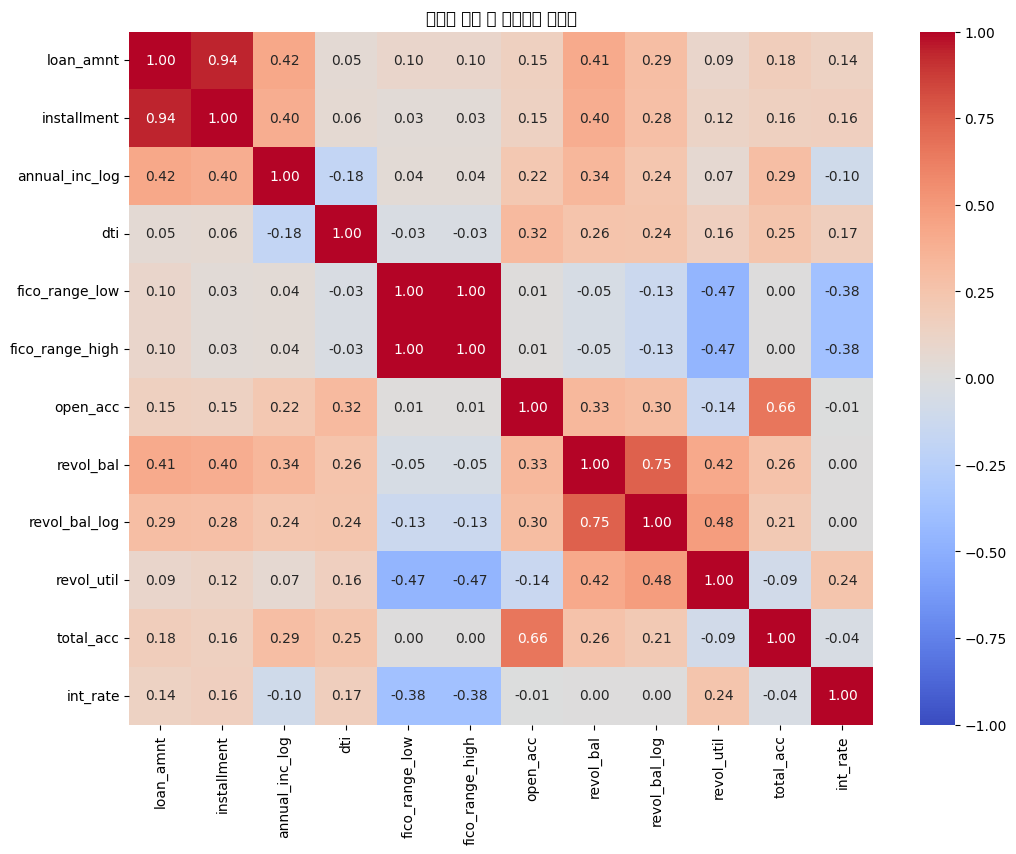

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 1. accepted_filtered 복사본 생성
df_analysis = accepted_filtered.copy()


# 2. 수치형 컬럼 리스트 (전처리 단계 고려, 로그 변환된 컬럼 포함)
numerical_cols = [
   'loan_amnt', 'installment', 'annual_inc_log', 'dti', 'fico_range_low', 'fico_range_high',
   'open_acc', 'revol_bal', 'revol_bal_log', 'revol_util', 'total_acc', 'int_rate'
]


# 3. 복사본에서 해당 컬럼이 존재하는지 확인(안정성)
numerical_cols = [col for col in numerical_cols if col in df_analysis.columns]


# 4. 결측값 제거
df_analysis = df_analysis.dropna(subset=numerical_cols).reset_index(drop=True)


# 5. 상관계수 행렬 계산
corr_matrix = df_analysis[numerical_cols].corr(method='pearson')


print("=== 수치형 변수 피어슨 상관계수 ===")
print(corr_matrix)


# 6. 히트맵 시각화
plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('수치형 변수 간 상관계수 히트맵')
plt.show()


여기까지

In [ ]:


# 데이터 준비
X = accepted.select_dtypes(include=['number']).drop(columns=['repayment_status'])
X = X.fillna(X.mean())
y = LabelEncoder().fit_transform(accepted['repayment_status'])

# 학습
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 중요도 출력
rf_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(rf_df)


ModuleNotFoundError: No module named 'sklearn'

In [2]:
rejected = pd.read_csv('rejected.csv')

rejected.head(10)

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,693.0,10%,481xx,NM,4 years,0.0
1,1000.0,2007-05-26,Consolidating Debt,703.0,10%,010xx,MA,< 1 year,0.0
2,11000.0,2007-05-27,Want to consolidate my debt,715.0,10%,212xx,MD,1 year,0.0
3,6000.0,2007-05-27,waksman,698.0,38.64%,017xx,MA,< 1 year,0.0
4,1500.0,2007-05-27,mdrigo,509.0,9.43%,209xx,MD,< 1 year,0.0
5,15000.0,2007-05-27,Trinfiniti,645.0,0%,105xx,NY,3 years,0.0
6,10000.0,2007-05-27,NOTIFYi Inc,693.0,10%,210xx,MD,< 1 year,0.0
7,3900.0,2007-05-27,For Justin.,700.0,10%,469xx,IN,2 years,0.0
8,3000.0,2007-05-28,title?,694.0,10%,808xx,CO,4 years,0.0
9,2500.0,2007-05-28,timgerst,573.0,11.76%,407xx,KY,4 years,0.0
